# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


## Data Analysis Steps

## Retreve Dataset

## Data cleansing

## Data Processing

## Data Analysis Univariate

## Data Analysis Multivariate


### Here are the libraries used for the project

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Retrieving and Cleaning Data for Commune Dataset

In [96]:
#Import Data from Commune Dataset File
commune_path = "commune.xlsx"
commune_data = pd.read_excel(commune_path)
commune_data.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [97]:
# Removing a repeated column and 
drop_cols=['Commune_en']
commune_data.drop(columns=drop_cols, inplace=True)

#Rename the columns for a better use and set Commune_id to Index of the Dataset
commune_cols=['commune','commune_id', 'departement','departement_id']
commune_data.columns=commune_cols
commune_data=commune_data.set_index('commune_id')
commune_data.head()

,commune,departement,departement_id
commune_id,,,
HT0812,Abricots,Grande'Anse,HT08
HT0321,Acul du Nord,North,HT03
HT0922,Anse-à-Foleur,North-West,HT09
HT0234,Anse-à-Pître,South-East,HT02
HT1021,Anse-à-Veau,Nippes,HT10


In [98]:
#Function to check for null values in Dataset
def check_null(data):
    null=data.isna().sum()
    return null

In [99]:
#Check for null values in Commune Dataset
check_null(commune_data)

commune           0
departement       0
departement_id    0
dtype: int64

### Retrieving and Cleaning Data for Quest Dataset

In [100]:
#Import Data from Quest Dataset file
quest_path="quest.csv" 
quest_data=pd.read_csv(quest_path, index_col=0)
quest_data.head(2)

,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [101]:
check_null(quest_data)

gender                0
dob                   6
commune               0
created_at            0
modified_at           0
department            1
education_level       0
university            0
study_domain          0
current_employed      0
formal_sector_job     0
have_computer_home    0
internet_at_home      0
hear_AA_1             0
after_AA              0
quest_id              0
dtype: int64

In [102]:
# Removing some unnecessary columns
drop_cols=['modified_at','formal_sector_job','after_AA','department']
quest_data.drop(columns=drop_cols, inplace=True)

#Rename the columns of the Dataset for a better use
quest_cols=['gender','dob','commune_id','created_at','education_level','university','study_domain','current_employed','computer_home','internet_home','hear_AA','quest_id']
quest_data.columns=quest_cols

#set the data in quest.commune_id to upper
quest_data['commune_id']=quest_data['commune_id'].str.upper()

#replace a wrong date format in the dataset
quest_data['dob'] = quest_data['dob'].replace(['3 aout 1977'],'03/08/1977')

#set commune_id to index
quest_data=quest_data.set_index('commune_id')

#set dob column to datetime type
quest_data['dob'] = pd.to_datetime(quest_data['dob'])

#This line fill all the null values in dob and departement column
quest_data.dob=quest_data['dob'].fillna(value=quest_data.dob.mean())

#replace null value in study_domain with the mode value
quest_data['study_domain'] = quest_data['study_domain'].replace(['[]'],quest_data['study_domain'].mode())
quest_data.head()

,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id
commune_id,,,,,,,,,,,
HT0111,male,1998-08-25,2021-02-14T23:03:52.768400Z,unknown,unknown,['item1'],unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
HT0111,female,1996-09-29,2021-02-16T16:01:10.861844Z,Bachelors (bacc +4),other,['other'],No,Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601
HT0111,male,1996-05-17,2021-02-16T16:56:30.579504Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item1'],No,Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601
HT0111,male,1996-11-24,2021-02-16T16:57:55.754541Z,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601
HT0111,male,1997-07-20,2021-02-16T17:05:40.907948Z,High School (16 years),unknown,['other'],No,Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [103]:
#check nul values
check_null(quest_data)

gender              0
dob                 0
created_at          0
education_level     0
university          0
study_domain        0
current_employed    0
computer_home       0
internet_home       0
hear_AA             0
quest_id            0
dtype: int64

In [104]:
#Function to check DUplicated
def check_duplicate(data):
    duplicate=data.duplicated().sum()
    return duplicate

In [105]:
check_duplicate(quest_data)

0

In [106]:
#shape of dataset before merge
print(quest_data.shape)
print(commune_data.shape)

(250, 11)
(140, 3)


In [107]:
dataset = pd.merge(left =commune_data,right=quest_data,how="inner",on="commune_id")

In [108]:
dataset

,commune,departement,departement_id,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id
commune_id,,,,,,,,,,,,,,
HT0731,Aquin,South,HT07,male,1995-12-05,2021-02-16T18:14:20.488505Z,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item6', 'item1']",No,Yes,Yes,Friend,9069789e-ce95-11eb-883e-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1995-09-16,2021-02-21T12:38:57.408531Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],Yes,Yes,Yes,Facebook,906a79ae-ce95-11eb-98c3-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1987-04-19,2021-02-21T16:06:15.024499Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item1'],No,Yes,No,Friend,906a79af-ce95-11eb-bd36-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1991-09-08,2021-03-03T00:04:49.909094Z,Other,unknown,['item7'],No,Yes,No,Facebook,906aa0a0-ce95-11eb-8355-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1987-02-22,2021-03-05T10:29:32.308601Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),"['item7', 'other']",No,Yes,Yes,Facebook,906aa0a1-ce95-11eb-899e-7c67a234f601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT0118,Tabarre,West,HT01,male,1988-09-17,2021-03-07T15:27:02.670785Z,Bachelors (bacc +4),unknown,"['item6', 'item3']",No,Yes,No,LinkedIn,9066879b-ce95-11eb-9d4a-7c67a234f601
HT0118,Tabarre,West,HT01,male,1997-11-23,2021-03-09T01:06:07.021925Z,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,"['item2', 'item3']",No,Yes,Yes,WhatsApp,9066abb5-ce95-11eb-aa16-7c67a234f601
HT0532,Verrettes,Artibonite,HT05,male,1980-12-04,2021-02-21T05:31:23.972463Z,Other,unknown,"['item1', 'item7']",Yes,Yes,Yes,WhatsApp,906a52b7-ce95-11eb-9c4b-7c67a234f601


### Retrieving and Cleaning Data from Enroll, Transaction & Ord Dataset

In [109]:
#Import Data from Enroll Dataset file
enroll_path="enroll.csv" 
enroll_data=pd.read_csv(enroll_path, index_col=0)
enroll_data.head(2)

,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN


In [110]:
#Selected the needed columns
cols=['user_id','quest_id']
enroll_data=enroll_data.loc[:,cols]

In [111]:
enroll_data.head(2)

,user_id,quest_id
0,29816173,NaN
1,35229766,NaN


In [112]:
#Import Data from Transaction Dataset file
trans_path="transaction.csv" 
trans_data=pd.read_csv(trans_path, index_col=0)
trans_data.head(2)

,created_at,modified_at,user_id,course_id,transaction_id
0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160


In [113]:
#Selected the needed columns
cols=['user_id']
trans_data=trans_data.loc[:,cols]

In [114]:
enroll_trans_data=pd.merge(left =enroll_data,right=trans_data,how="inner",on="user_id")

In [115]:
enroll_trans_data['payment_method']='MonCash'

In [116]:
enroll_trans_data=enroll_trans_data.loc[:,['quest_id','payment_method']]

In [117]:
enroll_trans_data.head(2)

,quest_id,payment_method
0,90628fc0-ce95-11eb-8dae-7c67a234f601,MonCash
1,9061d753-ce95-11eb-967a-7c67a234f601,MonCash


In [118]:
#Import Data from Ord Dataset file
ord_path="ord.csv" 
ord_data=pd.read_csv(ord_path, index_col=0)
ord_data.head(2)

,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601


In [119]:
#Selected the needed columns
cols=['user_id','quest_id']
ord_data=ord_data.loc[:,cols]
ord_data.head(2)

,user_id,quest_id
0,41587952,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,41564742,906636cf-ce95-11eb-8679-7c67a234f601


In [120]:
enroll_ord_data=pd.merge(left =enroll_data,right=ord_data,how="inner",on="user_id")

In [121]:
enroll_ord_data['payment_method']='CreditCard'

In [122]:
enroll_ord_data=enroll_ord_data.loc[:,['quest_id_x','payment_method']]
enroll_ord_data=enroll_ord_data.rename(columns={'quest_id_x':'quest_id'})
enroll_ord_data.head(2)

,quest_id,payment_method
0,NaN,CreditCard
1,9069789f-ce95-11eb-9788-7c67a234f601,CreditCard


In [123]:
#Let's concatenate the dataframe  
concatenation = pd.concat([enroll_ord_data,enroll_trans_data],axis = 0)

In [125]:
concatenation.head(25)

,quest_id,payment_method
0,NaN,CreditCard
1,9069789f-ce95-11eb-9788-7c67a234f601,CreditCard
2,905ec1ec-ce95-11eb-8136-7c67a234f601,CreditCard
3,9062b754-ce95-11eb-b31e-7c67a234f601,CreditCard
4,NaN,CreditCard
5,905f5dc1-ce95-11eb-bfa7-7c67a234f601,CreditCard
6,NaN,CreditCard
7,9064ff28-ce95-11eb-857f-7c67a234f601,CreditCard
8,9064ff29-ce95-11eb-a3d3-7c67a234f601,CreditCard
9,9060477c-ce95-11eb-ace3-7c67a234f601,CreditCard


In [206]:
final_dataset = pd.merge(dataset,concatenation,how = 'left', left_on = 'quest_id', right_on= 'quest_id')
#final.reset_index(inplace = True ,level = 0)
final_dataset['payment_method'] = final_dataset['payment_method'].fillna('No payment')

In [207]:
final_dataset.head()

,commune,departement,departement_id,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id,payment_method
0,Aquin,South,HT07,male,1995-12-05,2021-02-16T18:14:20.488505Z,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item6', 'item1']",No,Yes,Yes,Friend,9069789e-ce95-11eb-883e-7c67a234f601,No payment
1,Cap-Haïtien,North,HT03,male,1995-09-16,2021-02-21T12:38:57.408531Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],Yes,Yes,Yes,Facebook,906a79ae-ce95-11eb-98c3-7c67a234f601,No payment
2,Cap-Haïtien,North,HT03,male,1987-04-19,2021-02-21T16:06:15.024499Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item1'],No,Yes,No,Friend,906a79af-ce95-11eb-bd36-7c67a234f601,No payment
3,Cap-Haïtien,North,HT03,male,1991-09-08,2021-03-03T00:04:49.909094Z,Other,unknown,['item7'],No,Yes,No,Facebook,906aa0a0-ce95-11eb-8355-7c67a234f601,No payment
4,Cap-Haïtien,North,HT03,male,1987-02-22,2021-03-05T10:29:32.308601Z,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),"['item7', 'other']",No,Yes,Yes,Facebook,906aa0a1-ce95-11eb-899e-7c67a234f601,No payment


In [208]:
check_null(final_dataset)

commune             0
departement         0
departement_id      0
gender              0
dob                 0
created_at          0
education_level     0
university          0
study_domain        0
current_employed    0
computer_home       0
internet_home       0
hear_AA             0
quest_id            0
payment_method      0
dtype: int64

In [239]:
#Function that calculate age from Date of birth 
from datetime import datetime, date
def age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month,today.day)< (dob.month,dob.day))

In [240]:
final_dataset['dob'] = pd.to_datetime(final_dataset['dob'])

In [241]:
final_dataset['age'] = final_dataset['dob'].apply(age)

In [242]:
final_dataset.loc[:,['dob','age']]

,dob,age
0,1995-12-05,25
1,1995-09-16,25
2,1987-04-19,34
3,1991-09-08,29
4,1987-02-22,34
...,...,...
245,1988-09-17,32
246,1997-11-23,23
247,1980-12-04,40
248,1984-01-22,37


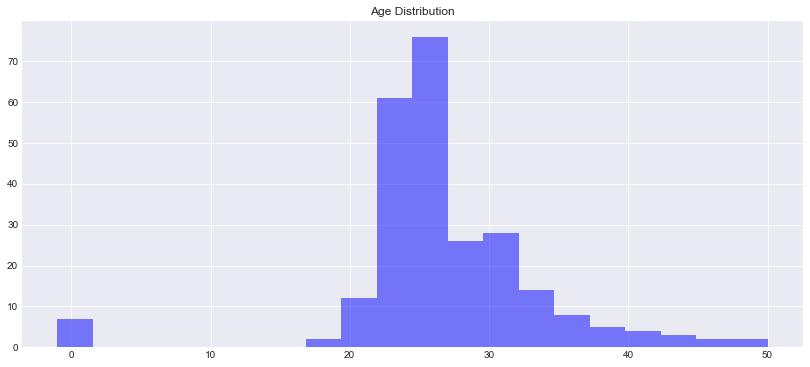

In [268]:
plt.figure(figsize=(14,6))
plt.style.use('seaborn-darkgrid')
plt.hist(final_dataset.age,bins=20,alpha =0.5,color="blue")
plt.title("Age Distribution")
plt.show()

In [243]:
gender_total=final_dataset.groupby(by=['gender']).gender.count().to_frame()
#gender_total.rename(columns={"Sex": "Total"},inplace=True)
gender_total.columns=['Total']

In [244]:
gender_total

,Total
gender,
female,47
male,203


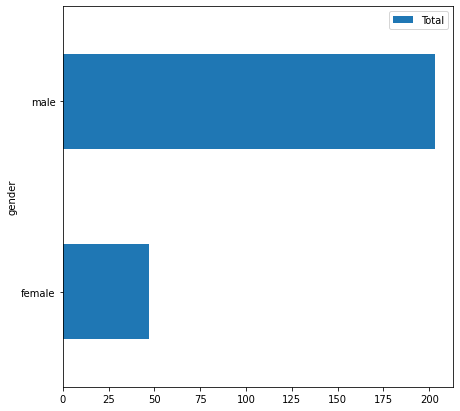

In [245]:
ax=gender_total.plot(kind='barh')
fig=ax.get_figure()
fig.set_size_inches(7, 7)

In [263]:
#prob_category(data=gender_total, col="gender", abs_value="Total", )
gender_commune=final_dataset.groupby(['commune']).gender.count().to_frame()
gender_commune=gender_commune.sort_values(by=['gender'] ,ascending=False)
gender_commune=gender_commune.iloc[:4,:]
gender_commune

,gender
commune,
Delmas,71
Port-au-Prince,59
Pétion-Ville,29
Carrefour,23


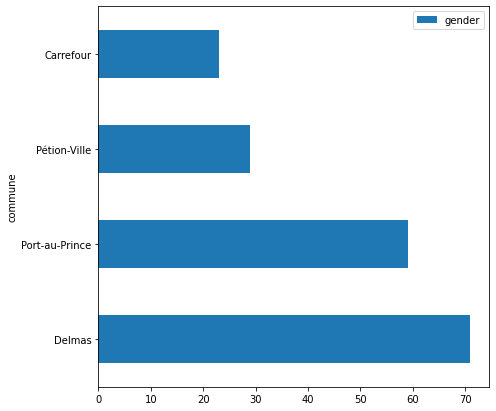

In [266]:
ax=gender_commune.plot(kind='barh')
fig=ax.get_figure()
fig.set_size_inches(7, 7)

In [258]:
my_pivot =  pd.pivot_table(data=final_dataset,index="hear_AA",columns="gender",values ="quest_id",aggfunc="count")
my_pivot=my_pivot.sort_values(['female','male'], ascending=False)
my_pivot

gender,female,male
hear_AA,,
Friend,11.0,56.0
WhatsApp,9.0,57.0
Bootcamp Alumni,8.0,6.0
Facebook,6.0,34.0
ESIH,5.0,13.0
Ayiti Analytics Website,4.0,11.0
other,2.0,7.0
LinkedIn,1.0,14.0
Instagram,1.0,4.0


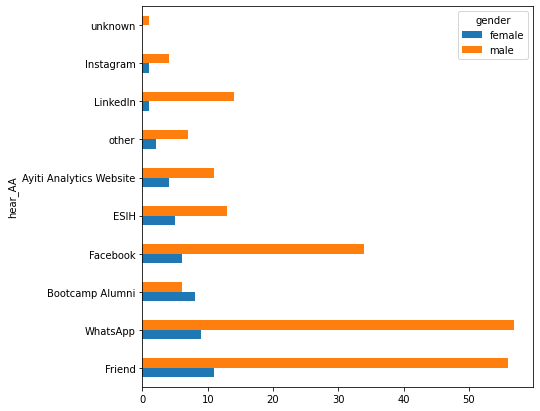

In [259]:
ax=my_pivot.plot(kind='barh')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 7)

In [279]:
def generate_barchart(data="", title ="",abs_value ="",rel_value="",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()


In [281]:
#generate_barchart(data=my_pivot,title="Total et Percent By Sex",abs_value="gender",rel_value="gender")

In [273]:
my_pivot2 = pd.pivot_table(data=final_dataset,index="commune",columns="gender",values ="quest_id",aggfunc="count")
my_pivot2=my_pivot2.sort_values(['female','male'], ascending=False)
my_pivot2=my_pivot2.iloc[:4,:]

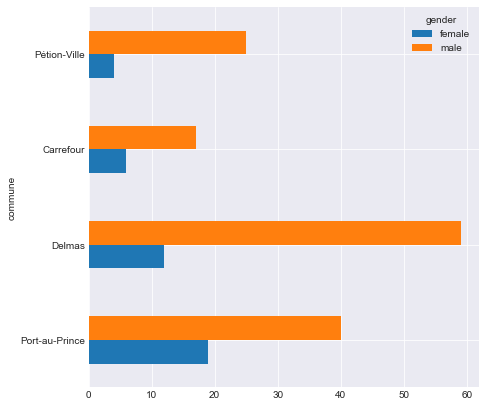

In [274]:
ax=my_pivot2.plot(kind='barh')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 7)

In [275]:
# kakile frekans absoli ak frekans relativ yon varyab kategorik
def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result


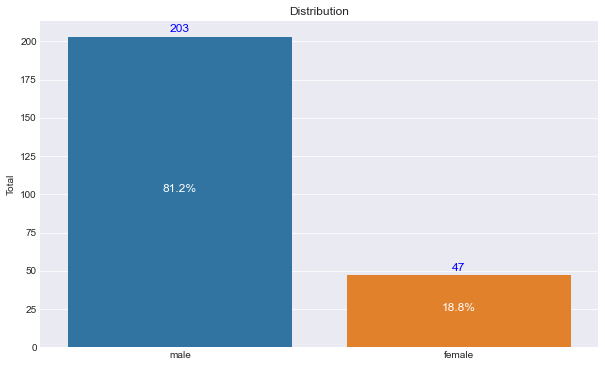

In [278]:
gender=prob_category(final_dataset, col='gender', show_plot=True, title='Distribution')

In [284]:
prob_female =  final_dataset[final_dataset.gender == "female"].shape[0] / 0.25
prob_female

188.0

In [283]:
final_dataset[final_dataset.gender == "female"].shape[0]

47

In [456]:
total =dataset.groupby(by=["gender"]).departement.count().to_frame()
total.columns = ["% Per Departement"]

In [127]:
def prob_category(data,col="", abs_value ="",rel_value ="",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result

## 3.- What is the average number of university students who should participate in this program

In [296]:
university = pd.pivot_table(data=final_dataset,index="commune",columns="education_level",aggfunc="count",fill_value=0)
university=university.loc[:,['Bachelors (bacc +4)','Masters','Doctorate (PhD, MD, JD)']]
university
#university=university.sort_values(['female','male'], ascending=False)
#university=university.iloc[:4,:]

KeyError: "['Bachelors (bacc +4)' 'Masters' 'Doctorate (PhD, MD, JD)'] not in index"

In [ ]:
['Bachelors (bacc +4)','Masters','Doctorate (PhD, MD, JD)']

In [294]:
uni=final_dataset['education_level'].unique()
uni

array(['Bachelors (bacc +4)', 'Other', 'High School (16 years)',
       'Masters', 'Doctorate (PhD, MD, JD)', 'unknown'], dtype=object)